<h1>Page View Time Series Visualizer</h1>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Task (1)

In [6]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Task (2)

In [22]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
   (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923


### Task (3)

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views6/2016-11/2019')

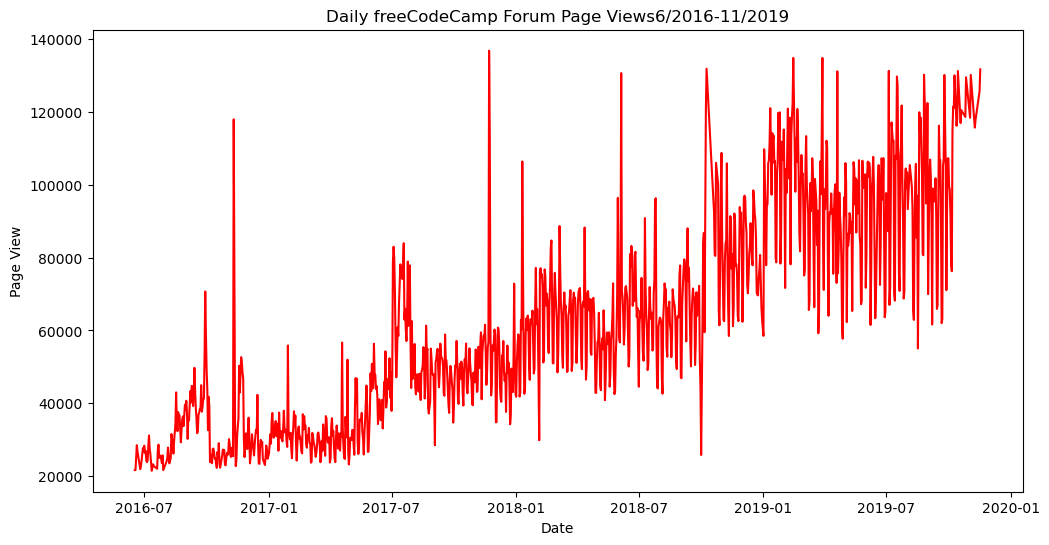

In [51]:
fig = plt.figure(figsize=(12,6))
plt.plot( df.index,df.value,
        color='red')

plt.xlabel('Date')
plt.ylabel('Page View')
plt.title('Daily freeCodeCamp Forum Page Views'
         + df.index[0].strftime('%-m/%Y')
         + '-'
         + df.index[-1].strftime('%-m/%Y'))

#### Save Figure

In [53]:
fig.savefig('line_plot.png')

### Task (4)

In [60]:
df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month_name'] = df.index.strftime('%B')

In [67]:
df_bar = df_bar.groupby(['year', 'month_name']) \
                   .agg('mean').reset_index()
df_bar.head()

,year,month_name,value
0,2016,August,32154.750000
1,2016,December,28690.928571
2,2016,July,25460.761905
3,2016,June,24666.777778
4,2016,November,36354.241379


In [74]:
months = pd.date_range('2020-01', '2020-12', freq='MS') \
.strftime('%B').tolist()
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [75]:
fig = plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

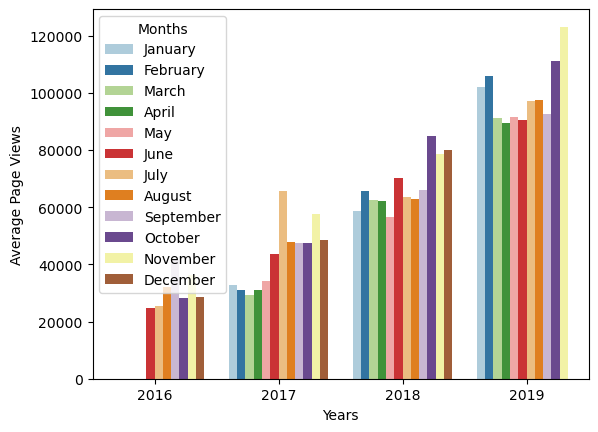

In [105]:
sns.barplot(x = 'year', y='value', data=df_bar,
           hue='month_name',
           hue_order=months,
           palette='Paired',
           ec=None)

plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months', loc='upper left')

In [106]:
fig.savefig('bar_plot.png')

In [108]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [110]:
months = pd.date_range('2020-01', '2020-12', freq='MS') \
              .strftime('%b').tolist()
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Text(0, 0.5, 'Page Views')

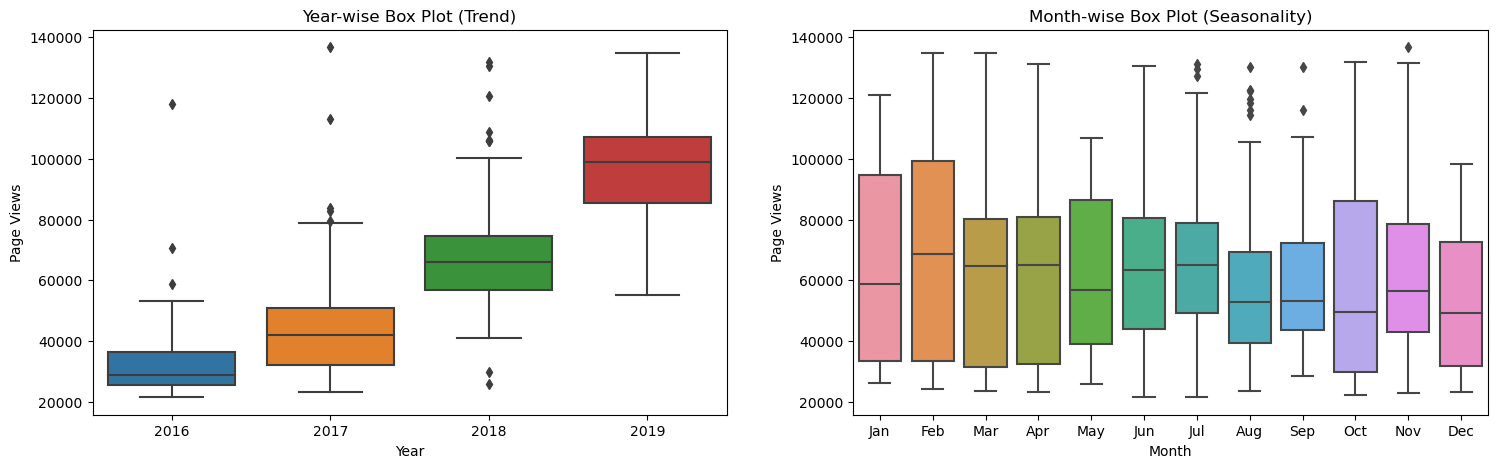

In [115]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
ax = axes[0]
sns.boxplot(x="year", y="value", data=df_box, ax=ax)
ax.set_title('Year-wise Box Plot (Trend)')
ax.set_xlabel('Year')
ax.set_ylabel('Page Views')

ax = axes[1]
sns.boxplot(x="month", y="value", data=df_box, order=months, ax=ax)
ax.set_title('Month-wise Box Plot (Seasonality)')
ax.set_xlabel('Month')
ax.set_ylabel('Page Views')

In [113]:
fig.savefig('box_plot.png')